In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
data = pd.read_csv('HistoricRates_BTC(test)')

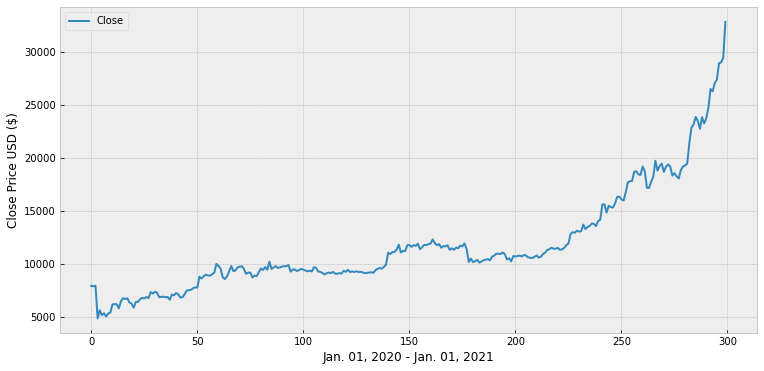

In [5]:
plt.figure(figsize=(12.5, 6))
plt.plot(data['close'], label='Close')
plt.xlabel('Jan. 01, 2020 - Jan. 01, 2021')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [22]:
#Get close price into new dataframe
df = data[['close']]


In [23]:
future_days = 25

#New column (target) shifted 'x' units/days up
df['Prediction'] = df[['close']].shift(-future_days)
df.tail(4)

<ipython-input-23-29be464bb1a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['close']].shift(-future_days)


,close,Prediction
296,28897.42,NaN
297,28990.08,NaN
298,29412.84,NaN
299,32791.47,NaN


In [24]:
#Create feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]

In [27]:
 #Create the target data set (y) and convert it to a numpy array and get all of the target values except Prediction
y = np.array(df['Prediction'])[:-future_days]

In [29]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [30]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [32]:
#Get the last 'x' rows of the features data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[16082.01],
       [15966.89],
       [16726.64],
       [17679.36],
       [17782.91],
       [17821.58],
       [18675.25],
       [18721.21],
       [18437.66],
       [18384.82],
       [19172.84],
       [18721.93],
       [17170.  ],
       [17153.95],
       [17739.85],
       [18202.04],
       [19713.94],
       [18782.97],
       [19225.63],
       [19448.64],
       [18658.1 ],
       [19158.96],
       [19375.6 ],
       [19177.71],
       [18316.22]])

In [33]:
#Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[18546.55 18253.44 18042.15 18821.28 19166.65 19272.37 21359.65 21359.65
 23137.76 23137.76 23849.99 21359.65 22729.4  23823.27 19166.65 23717.96
 24704.71 26475.35 29412.84 28990.08 21359.65 28897.42 28990.08 29412.84
 32791.47]

[19551.35583905 19394.0069917  20432.4519776  21734.65310555
 21876.18779234 21929.04289942 23095.86005126 23158.67930964
 22771.11619578 22698.89318419 23775.97830138 23159.66342334
 21038.44732994 21016.5097952  21817.33232529 22449.06498476
 24515.56708963 23243.09439661 23848.13297174 24152.94852463
 23072.41900946 23757.00677601 24053.11565622 23782.63473716
 22605.12901699]


<ipython-input-37-243ea4275b0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


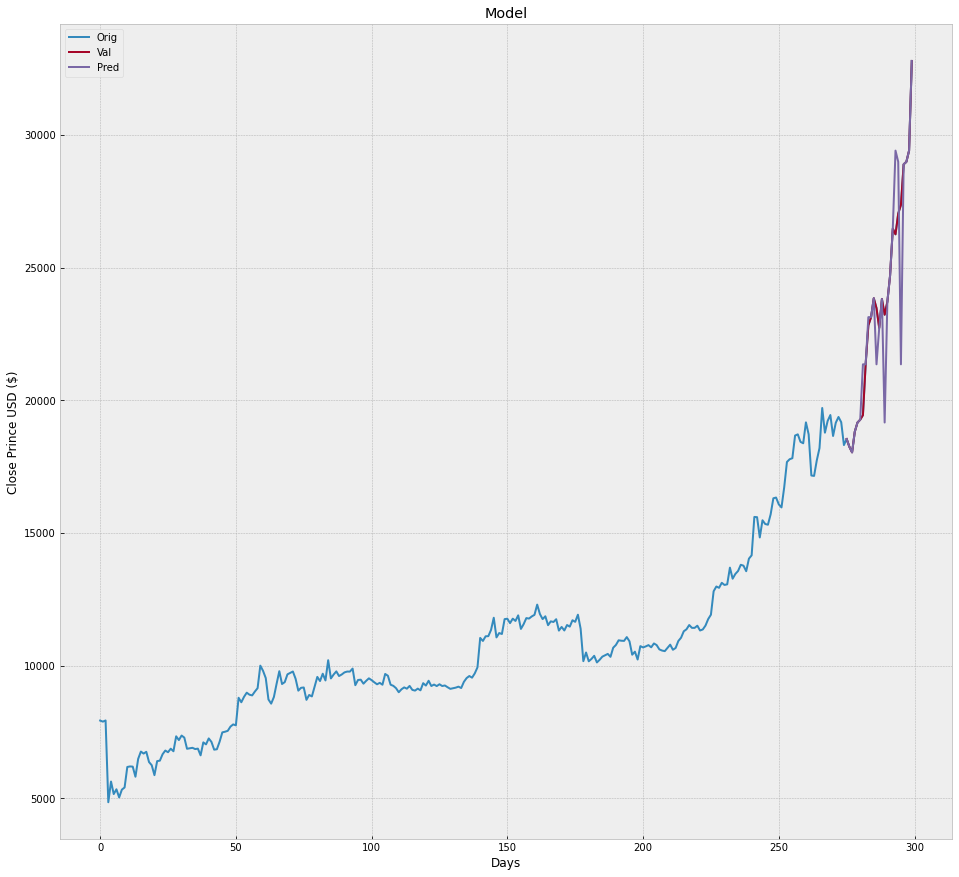

In [37]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,15))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Prince USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-38-dbde66ed8358>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


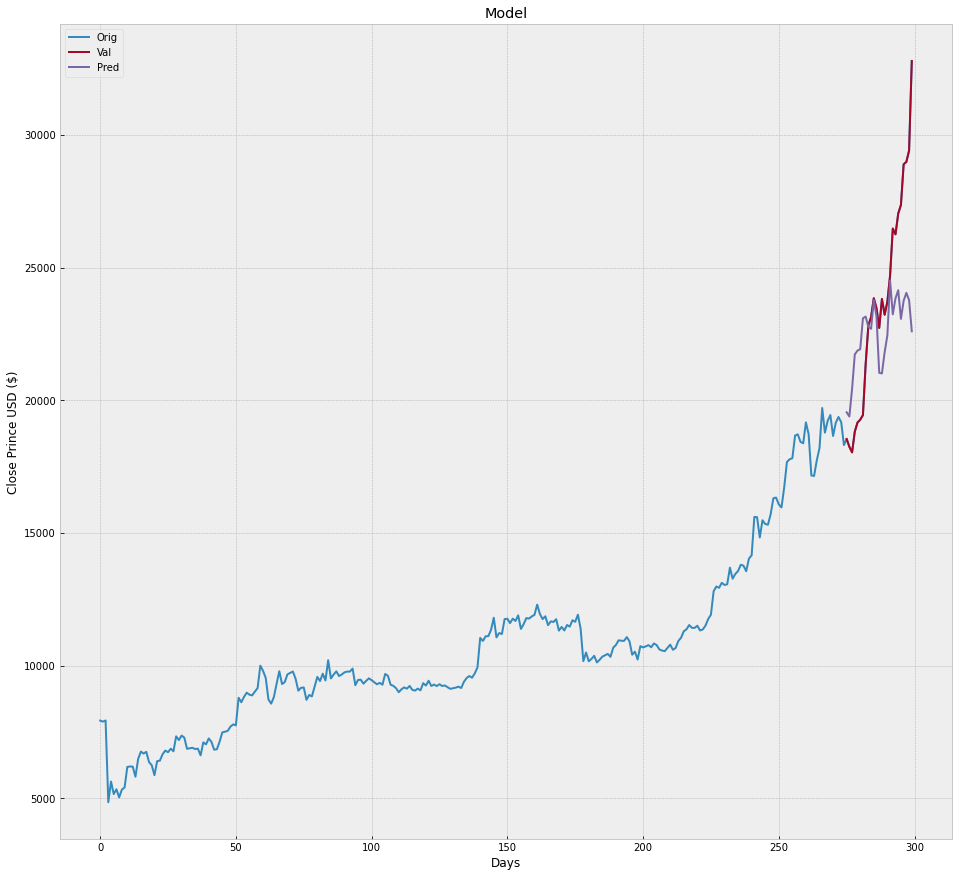

In [38]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,15))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Prince USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()